<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/RSI_Monthly_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"To find the relationship between RSI and monthly returns you can use the k-means technique of unsupervised learning. The steps are as follows:

1. Calculate RSI and monthly returns
2. Scale the data
3. Apply k-means for optimum number of clusters. Use the WCSS technique to select the optimum clusters.
4. Plot the clusters on the X-Y chart and see the relationship between RSI values and monthly returns."

In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
data=yf.download('^nsei','2015-01-01','2020-12-01')

[*********************100%***********************]  1 of 1 completed


In [63]:
data.ta.rsi(length=14,append='True')
data['ret30']=data['close'].diff(30)/data['close']
print()

In [64]:
data.tail(5)

,open,high,low,close,adj_close,volume,RSI_14,ret30
date,,,,,,,,
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100,72.943548,0.078308
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900,75.293228,0.086112
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000,65.874822,0.071852
2020-11-26,12906.450195,13018.000000,12790.400391,12987.000000,12987.000000,549800,68.636398,0.078228
2020-11-27,13012.049805,13035.299805,12914.299805,12968.950195,12968.950195,1162400,67.806979,0.099360


In [65]:
selected_data=data[['RSI_14','ret30']].dropna()

In [78]:
selected_data.shape

(1420, 2)

In [79]:
selected_data.tail(2)

,RSI_14,ret30
date,,
2020-11-26,68.636398,0.078228
2020-11-27,67.806979,0.099360


In [66]:
sc=StandardScaler()

In [67]:
data_transformed=sc.fit_transform(selected_data)


In [69]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

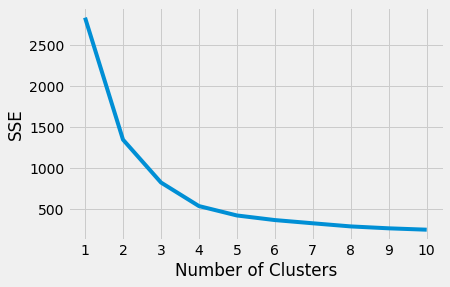

In [70]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [71]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)


In [73]:
df=kmeans.fit(data_transformed)

In [84]:
len(df.labels_)

1420

In [86]:
plt.scatter(data_transformed[0][:,0],data_transformed[0][:,1],c=df.labels)

IndexError: ignored